In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Part 1: Discovering the Default dataset...

The documentation of this dataset can be found here: https://cran.r-project.org/web/packages/ISLR/ISLR.pdf

1. Take some time to familiarize yourself with the dataset: what does it look like? what is each feature? (The documentation may come in handy.)

In [83]:
Default=pd.read_csv("Default.csv")

In [85]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [86]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


2. Do the values in the dataset make sense? Are there duplicates? Missing values?

In [87]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


In [88]:
Default["student"].unique()

array(['No', 'Yes'], dtype=object)

In [89]:
Default["default"].unique()

array(['No', 'Yes'], dtype=object)

In [90]:
Default.isna().any()

default    False
student    False
balance    False
income     False
dtype: bool

In [91]:
Default.duplicated().any()

False

3. Recall the `pd.get_dummies(df,columns=["col1", "col2"], drop_first=True)` command. Use this to get a fully numerical dataset.

In [92]:
Default=pd.get_dummies(Default,columns=["student","default"],drop_first=True)

In [93]:
Default

,balance,income,student_Yes,default_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,1,0
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0
...,...,...,...,...
9995,711.555020,52992.37891,0,0
9996,757.962918,19660.72177,0,0
9997,845.411989,58636.15698,0,0
9998,1569.009053,36669.11236,0,0


4. Use `plt.scatter` to plot `default_Yes` as a function of `balance`.

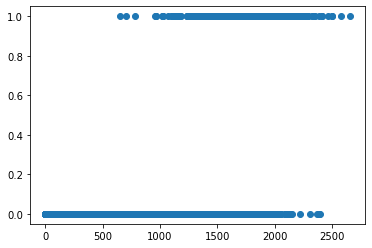

In [21]:
plt.scatter(Default["balance"],Default["default_Yes"])

# Part 2: From Linear to Logistic Regression...

1. Run a linear regression as seen last lecture with `X` and `Y` as defined in class. What is R^2? The coefficients?

In [23]:
X=Default[["balance"]]
Y=Default["default_Yes"]

lm = LinearRegression().fit(X, Y) # Fit a linear regression with vector Y as dependent and matrix X as independent

print("Intercept = ",lm.intercept_) # Print the resultant model intercept 

print("Model coefficients = ", lm.coef_) # Print the resultant model coefficients (in order of variables in X)

print("R^2 =",lm.score(X,Y)) # Print the resultant model R-squared


Intercept =  [-0.07519196]
Model coefficients =  [[0.00012987]]
R^2 = 0.12258348714466394


2. Plot the datapoints using `plt.scatter()` and the curve using `plt.plot()`.

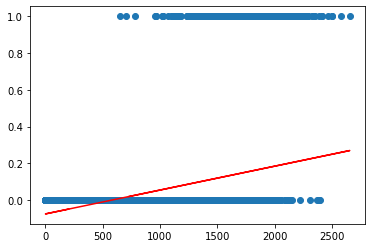

In [24]:
#We plot the result using scikit and matplot lib: start by computing the predicted values under our model and then plot
Y_pred=lm.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_pred,color="red")

3. What is the balance for the second observation? And the corresponding predicted value for default? How would you answer the question: is this customer going to default? Can you give an interpretation of the predicted value in this context?

In [35]:
X.loc[1] #alternatively X["balance"][1]

balance    817.180407
Name: 1, dtype: float64

In [47]:
print(X.loc[1])
Y_pred[1]

balance    817.180407
Name: 1, dtype: float64


array([0.03093704])

4. What is the value of balance for the 10000th observation? What is the predicted value for the 10000th observation? How would you answer the question: is this customer going to default? Can you give an interpretation of the predicted value in this context?

In [48]:
print(X["balance"][9999]) #X.iloc[-1]
Y_pred[9999]

200.9221826


array([-0.04909776])

# Part 3: Logistic regression

1. Use the code below to run the logistic regression. Note how similar this is to linear regression. What are the differences?

In [49]:
#logistic regression with scikit
X=Default[["balance"]]
y=Default["default_Yes"]

logm = LogisticRegression().fit(X, y) # Fit a logistic regression with vector Y as dependent and matrix X as independent

print("Intercept = ",logm.intercept_) # Print the resultant model intercept 

print("Model coefficients = ", logm.coef_) # Print the resultant model coefficients (in order of variables in X)

print("R^2 =",logm.score(X,y)) # Print the resultant model R-squared

Intercept =  [-10.65132824]
Model coefficients =  [[0.00549892]]
R^2 = 0.9725


2. We can get two different outputs: either the predicted probabilities or the predicted labels (0 or 1, doesn't default or defaults). Run the code below. Which one is which?

In [51]:
#getting the predicted labels
logm.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [52]:
#getting the predicted probabilities 
logm.predict_proba(X)

array([[9.98694319e-01, 1.30568146e-03],
       [9.97887402e-01, 2.11259754e-03],
       [9.91405252e-01, 8.59474814e-03],
       ...,
       [9.97533484e-01, 2.46651596e-03],
       [8.83240365e-01, 1.16759635e-01],
       [9.99928552e-01, 7.14476480e-05]])

# Part 4: Multivariate logistic regression

The goal of this part is to use the other features in the dataset to predict default and to go through the supervised machine learning pipeline.

1. Create the label vector `Y` and the features matrix `X` by using `.drop(columns=["col1"])` from the dataset `Default`.

In [94]:
Y=Default["default_Yes"] #creating the dependent variable
X=Default.drop(columns=["default_Yes"]) #dropping the dependent variable to get a matrix of independent features

2. We are going to build the correlation matrix between the variable. Try running the code below. Which variables are correlated? Drop the `income` column.

In [95]:
X.corr()

,balance,income,student_Yes
balance,1.000000,-0.152243,0.203578
income,-0.152243,1.000000,-0.753985
student_Yes,0.203578,-0.753985,1.000000


In [96]:
X=X.drop(columns=["income"])
X

,balance,student_Yes
0,729.526495,0
1,817.180407,1
2,1073.549164,0
3,529.250605,0
4,785.655883,0
...,...,...
9995,711.555020,0
9996,757.962918,0
9997,845.411989,0
9998,1569.009053,0


3. Using `train_test_split`, split the data into two sets: 75% training set, 25% testing set.

In [97]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.25)

4. Run a logistic regression on the **training set**. Comment on the coefficients.

In [98]:
#logistic regression with scikit

logm = LogisticRegression().fit(trainX, trainY) # Fit a logistic regression with vector Y as dependent and matrix X as independent

print("Intercept = ",logm.intercept_) # Print the resultant model intercept 

print("Model coefficients = ", logm.coef_) # Print the resultant model coefficients (in order of variables in X)

Intercept =  [-10.62680198]
Model coefficients =  [[ 0.00569239 -0.6683316 ]]


5. Run the code below to obtain the confusion matrix. Note that we are obtaining the confusion matrix for the **test data** not the train data. What do you think of it?

In [101]:
Y_pred=logm.predict(testX)
from sklearn.metrics import confusion_matrix
confusion_matrix(testY,Y_pred)

array([[2411,   13],
       [  49,   27]], dtype=int64)